# Part 1 – Data Preparation and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
import seaborn as sns
from collections import Counter
from IPython.display import display

#set seaborn style
sns.set()
sns.set_style("whitegrid")


# Analyzing SEEK job market data

In [5]:
df = pd.read_csv('data.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head()


The Dataset consists of:  318477  rows and  13  columuns


/var/folders/h0/8_wby_212cs0h3_gmjklt61c0000gn/T/ipykernel_10571/1902105309.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


Date Range

In [6]:
dates = df.sort_values('Date')['Date'].dropna().unique()
start_date = dates[0]
end_date = dates[len(dates)-1]

In [7]:
start_date


'2018-10-01T00:00:00.000Z'

In [8]:
end_date


'2019-03-13T00:00:00.000Z'

Getting the number of variations for each attribute:

In [9]:
_ids = df['Id'].nunique()
_titles = df['Title'].nunique()
_companies = df['Company'].nunique()
_dates = df['Date'].nunique()
_locations = df['Location'].nunique()
_area = df['Area'].nunique()
_classes = df['Classification'].nunique()
_subclasses = df['SubClassification'].nunique()
_requirements = df['Requirement'].nunique()
_description = df['FullDescription'].nunique()
_lowest_salary = df['LowestSalary'].nunique()
_highest_salary = df['HighestSalary'].nunique()
_job_type = df['JobType'].nunique()


In [10]:
data = {'Columns': ['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification', 'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary', 'HighestSalary', 'JobType'],
        'Unique Values': [_ids, _titles, _companies, _dates, _locations, _area, _classes, _subclasses, _requirements, _description, _lowest_salary, _highest_salary, _job_type]}

df_unique = pd.DataFrame(data)

display(df_unique)


,Columns,Unique Values
0,Id,318477
1,Title,168065
2,Company,40628
3,Date,163
4,Location,65
5,Area,19
6,Classification,30
7,SubClassification,338
8,Requirement,234287
9,FullDescription,250901


How many records are there in the dataset?

In [11]:
num_records = len(df)
num_records

318477

Which location has the most job postings?

In [12]:
df['Location'].mode()[0]


'Sydney'

How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings.

In [13]:
job_sector_counts = df['Classification'].value_counts()
num_job_sectors = len(job_sector_counts)

print("Number of job sectors:", num_job_sectors)
print("Job sectors and their total job postings:")

for sector, count in job_sector_counts.items():
    print(sector, "-", count)


Number of job sectors: 30
Job sectors and their total job postings:
Information & Communication Technology - 22796
Trades & Services - 17976
Healthcare & Medical - 17085
Hospitality & Tourism - 15523
Manufacturing, Transport & Logistics - 12376
Administration & Office Support - 10020
Accounting - 9368
Education & Training - 9280
Construction - 8372
Sales - 8119
Retail & Consumer Products - 8041
Government & Defence - 7443
Engineering - 6458
Mining, Resources & Energy - 6288
Banking & Financial Services - 4633
Community Services & Development - 4485
Legal - 4237
Human Resources & Recruitment - 4144
Call Centre & Customer Service - 3971
Marketing & Communications - 3968
Real Estate & Property - 3614
Design & Architecture - 1811
Insurance & Superannuation - 1474
Consulting & Strategy - 1206
Sport & Recreation - 984
Science & Technology - 905
Farming, Animals & Conservation - 882
CEO & General Management - 844
Advertising, Arts & Media - 833
Self Employment - 93


how many sub-sectors are there in the Information & Communication Technology) sector? List the name of each sub-sector and
its’ job posting number

In [14]:
ict_subsector_counts = df[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts()
num_ict_subsectors = len(ict_subsector_counts)

print("Number of sub-sectors in the ICT sector:", num_ict_subsectors)
print("ICT sub-sectors and their job posting counts:")

for subsector, count in ict_subsector_counts.items():
    print(subsector, "-", count)


Number of sub-sectors in the ICT sector: 22
ICT sub-sectors and their job posting counts:
Developers/Programmers - 4211
Business/Systems Analysts - 2986
Programme & Project Management - 2413
Architects - 1548
Engineering - Software - 1437
Help Desk & IT Support - 1374
Networks & Systems Administration - 1194
Consultants - 1149
Other - 997
Testing & Quality Assurance - 831
Security - 774
Management - 746
Engineering - Network - 552
Database Development & Administration - 551
Web Development & Production - 452
Sales - Pre & Post - 449
Product Management & Development - 376
Telecommunications - 357
Team Leaders - 173
Engineering - Hardware - 116
Technical Writing - 97
Computer Operators - 13


List the salary ranges and their total of job postings.

In [15]:
salary_ranges = df['LowestSalary'].astype(str) + ' - ' + df['HighestSalary'].astype(str)
salary_counts = salary_ranges.value_counts()

print("Salary ranges and their total job postings:")
for salary_range, count in salary_counts.items():
    print(salary_range, "-", count)


Salary ranges and their total job postings:
0 - 30 - 62639
40 - 50 - 34436
70 - 80 - 28712
60 - 70 - 28499
100 - 120 - 27673
50 - 60 - 27027
150 - 200 - 25841
120 - 150 - 24514
80 - 100 - 24249
30 - 40 - 23476
200 - 999 - 11411


List the job types. In each job type, what are the lowest salary and highest salary?

In [16]:
df['JobType'].value_counts()


JobType
Full Time          201225
Contract/Temp       53906
Casual/Vacation     25355
Part Time           21893
Name: count, dtype: int64

In [17]:
job_types = ['Full Time', 'Contract/Temp', 'Casual/Vacation', 'Part Time']

print("Job types and their salary ranges:")
for job_type in job_types:
    filtered_df = df[df['JobType'] == job_type]
    lowest_salary = filtered_df['LowestSalary'].min()
    highest_salary = filtered_df['HighestSalary'].max()
    print(job_type, "- Lowest Salary:", lowest_salary, " Highest Salary:", highest_salary)


Job types and their salary ranges:
Full Time - Lowest Salary: 0  Highest Salary: 999
Contract/Temp - Lowest Salary: 0  Highest Salary: 999
Casual/Vacation - Lowest Salary: 0  Highest Salary: 999
Part Time - Lowest Salary: 0  Highest Salary: 999


# 1.1 Describe the dataset.

The dataset from seek.com comprises of 318,477 job postings that were collected between October 1st, 2018, and March 13th, 2019. Each job posting contains 13 attributes, but some of these attributes appear to have missing data. Therefore, the next step in the analysis involves investigating the missing data and data types to carry out data preprocessing and cleaning.

The dataset consists of 318477 rows, and 13 columns. 

As shown above, the total number of unique values for the 13 attributes that comprises a SEEK post have been displayed in a table.

The number of IDs are 318477. Each ID represents a unique job post, which means there are 318477 different job posts that have been collected for analysis within the dataset. The ID column does not contain any other relevant information that could be useful for understanding the job market in Australia, therefore it will not be analysed in as great of depth compared to other attributes of the data.

There is a significant amount of variation in the job titles, requirements, and full descriptions within the dataset, listing 168065 different outputs. This suggests that there is no standardized method for selecting job titles. As these attributes are in textual format and cannot be easily categorized, the large number of different titles, requirements, and descriptions implies that there may not be much information that can be obtained from these columns. 

Despite the size of the dataset, there are still approximately 40,000 unique companies represented within it. However, this information can be leveraged to identify the most popular companies within specific locations or job sectors.

The dataset includes 163 unique dates, which cover the range of job posts from October 1st, 2018 to October 13th, 2019. That means 163 different dates have job postings

The Location column lists 65 different cities within Australia as categorical variables. It was found that Sydney has the most job postings. The data is useful for comparing job attributes across various locations and determining if job location impacts the results of employment attributes.   

Likewise, the variable "Area" is also categorical, with 19 unique variations, however it is more specific than 'Location', as it details the inner location within the city. There are various Nan inputs, implying that there is missing data within this column.

There are 30 different job sectors (job classification). Contains categorical variables. Can be used to determine which are the more popular employement sectors. 

The variable "SubClassification" is also categorical, and it serves to further break down each "Classification" into more specific categories.

Requirements appear to be casual remarks made within the post, while FullDescription has a great deal of missing data, and does not provide a great deal of numerical insight into the data.  

The variables "LowestSalary" and "HighestSalary" are numerical and have 11 unique ranges. These variables will be used for analysis in relation to "Location" and "Classification" to identify where there is greater potential for workers to earn higher salaries.

JobType has 4 different outputs. These outputs may be useful to determine if there is a correlation between job type and employee salary. 



# 1.2 Normalize and clean the data

The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You
should calculate the “AverageSalary” for each job.

In [18]:
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)
df['AverageSalary'].value_counts()



AverageSalary
15.0     62639
45.0     34436
75.0     28712
65.0     28499
110.0    27673
55.0     27027
175.0    25841
135.0    24514
90.0     24249
35.0     23476
599.5    11411
Name: count, dtype: int64

The raw dataset values of the "Id" column had inconsistencies in their
representation. The Id values should have 8 number long integers only. Write code
to remove unnecessary characters.

In [19]:
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)


The "Date" column is represented in a format that contained both date and time
information. However, the time is not correct and should be removed.

In [20]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df.head()


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


Change type of “Id” column to numeric and change type of “Date” column to
DateTime

In [31]:
# Set column "Id" to type int64
df["Id"] = df["Id"].astype(np.int64)

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])

# Data types after data cleaning and conversions
df.dtypes


Unnamed: 0                    int64
Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

Are there any duplicate data in the dataset? Provide the way you find them and your
solution to fix it

In [22]:
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)


Duplicates found:  108
Additional duplicates found without regard to timestamp:  43


Removing duplicates:

In [23]:
df.drop_duplicates(inplace=True)


In [24]:
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)


Duplicates found:  0
Additional duplicates found without regard to timestamp:  43


Check missing data and visualize them in a corresponding chart.

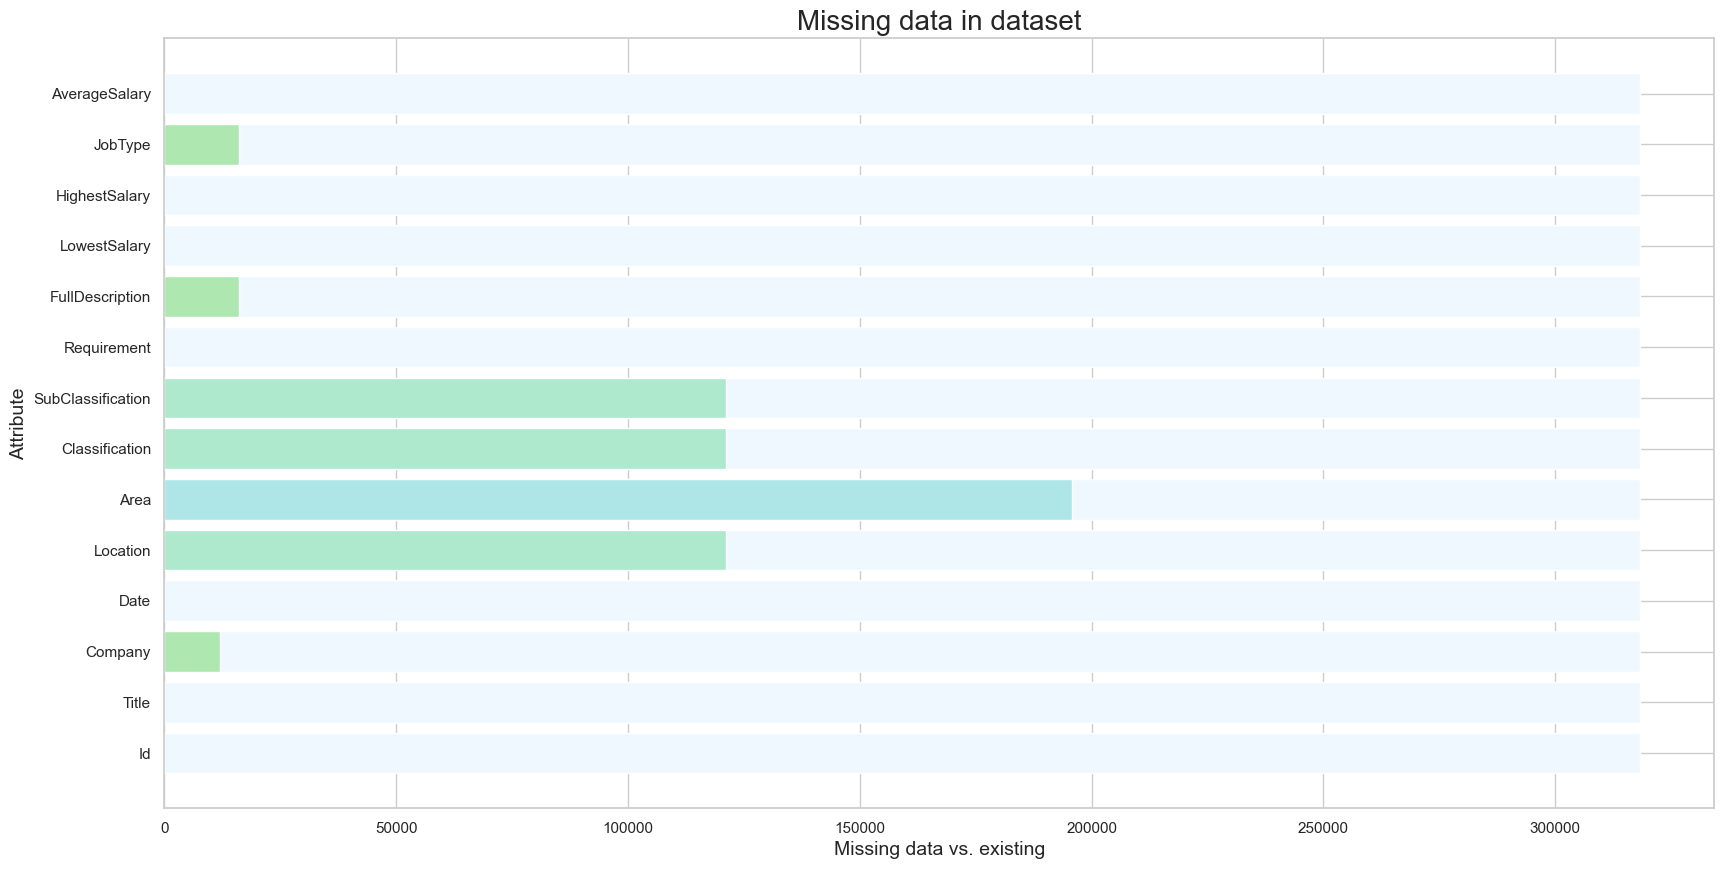

In [25]:
def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return '#AEE8B0'
    elif(value >= high):
        return '#AEE6E8'
    else:
        return '#AEE8CD'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();


In [26]:
nor = df.shape[0]

print('Attributes with missing data: ')
for i in range(len(nulls)):
    if(nulls[i] > 0):
        print('    {0}: {1:.2f}%'.format(df.columns.values[i], (nulls[i] / nor) * 100))
        

Attributes with missing data: 
    Company: 3.77%
    Location: 38.08%
    Area: 61.50%
    Classification: 38.08%
    SubClassification: 38.08%
    Requirement: 0.00%
    FullDescription: 5.07%
    JobType: 5.04%


In [27]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# Part 2 - Data Understanding

In [2]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

/var/folders/h0/8_wby_212cs0h3_gmjklt61c0000gn/T/ipykernel_2232/1469898370.py:1: DtypeWarning: Columns (5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('preprocessed_data.csv')


,Unnamed: 0,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [59]:
colors = ['#AEE6E8', '#AEC7E8', '#AEC9E8', '#B0AEE8', '#CDAEE8', '#E8AEE6', '#E8AEC9']

two_colors = ['#B4AEE8','#D1AEE8','#E8AEE2','#E8AEC5','#E8B4AE', '#E8D1AE']

third_colour = ['#AEE6E8', '#AEC9E8', '#B0AEE8', '#CDAEE8', '#E8AEE6', '#E8AEC9']



Get the salary ranges using “AverageSalary”, the total jobs of each range and display
them in the bar chart

In [4]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Unnamed: 0,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,,
15.0,62586,62586,62586,59564,62586,38488,24364,38488,38488,62584,56043,62586,62586,56058,"15,000",62586
35.0,23471,23471,23471,22292,23471,16391,9809,16391,16391,23471,22091,23471,23471,22093,"35,000",23471
45.0,34431,34431,34431,32071,34431,21731,13259,21731,21731,34430,33575,34431,34431,33580,"45,000",34431
55.0,27018,27018,27018,25670,27018,16552,10746,16552,16552,27017,26197,27018,27018,26213,"55,000",27018
65.0,28495,28495,28495,27286,28495,18117,11390,18117,18117,28495,27542,28495,28495,27564,"65,000",28495
75.0,28706,28706,28706,27788,28706,17047,10451,17047,17047,28706,27664,28706,28706,27668,"75,000",28706
90.0,24249,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27669,27669,27669,27146,27669,17133,10571,17133,17133,27667,26678,27669,27669,26679,"110,000",27669
135.0,24506,24506,24506,24157,24506,14693,9476,14693,14693,24506,23602,24506,24506,23604,"135,000",24506


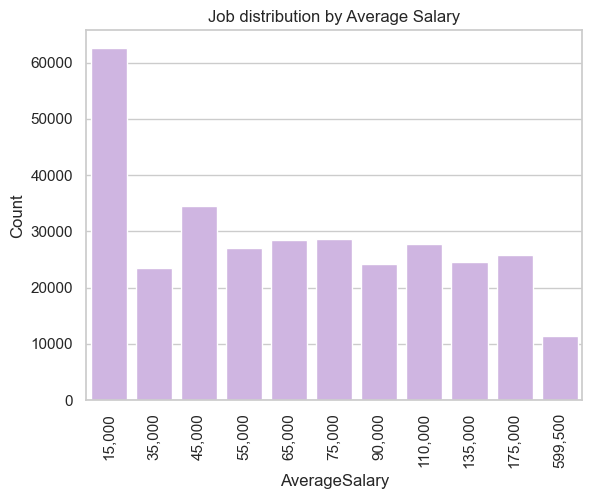

In [6]:
sns.set()
sns.set_style("whitegrid")

sns.barplot(data=averageSalaryDf, x="AverageSalary", y="Count", color="#D1AEE8")
plt.title("Job distribution by Average Salary")
plt.xticks(rotation = 90)
plt.show()

Display the list of job types and the number of jobs of each type using pie chart

In [41]:
df['JobType'].value_counts()


JobType
Full Time          201172
Contract/Temp       53897
Casual/Vacation     25353
Part Time           21889
Name: count, dtype: int64

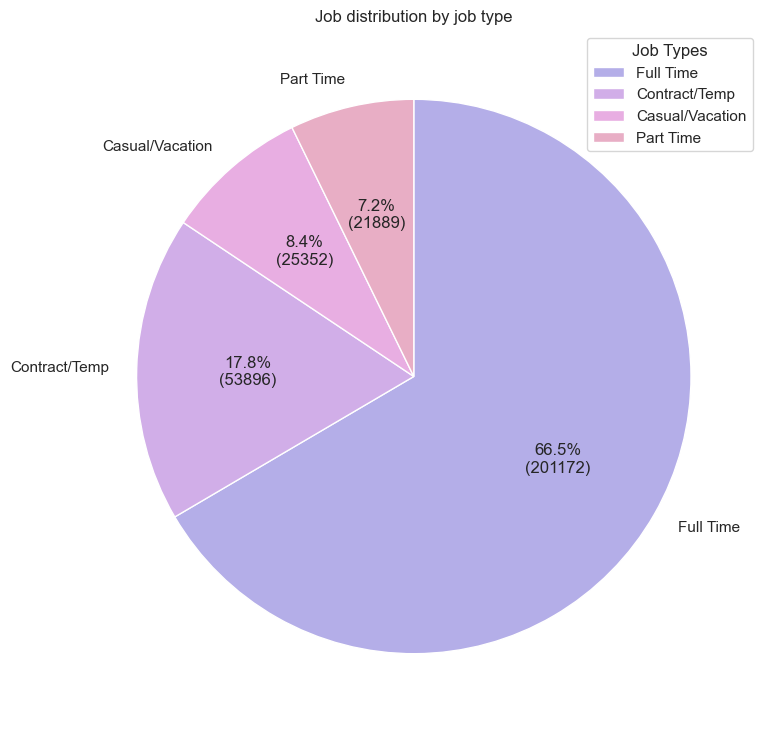

In [29]:
jobTypeCounts = df['JobType'].value_counts()

plt.figure(figsize=(9, 9))
plt.title("Job distribution by job type")

# Plotting the pie chart
plt.pie(
    jobTypeCounts.values,
    labels=jobTypeCounts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(jobTypeCounts.values) / 100)})',
    colors=two_colors,
    startangle=90,
    counterclock=False
)

# Adding a legend
plt.legend(title="Job Types", loc="best")

# Displaying the chart
plt.show()


Display the list of job sectors and the number of jobs of each type using horizontal bar
chart

In [8]:
classificationDf = df[df['Classification'].isna()==False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Id"]
classificationDf.sort_values("Count", ascending=False, inplace=True)
classificationDf.head()

,Unnamed: 0,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Classification,Count
Classification,,,,,,,,,,,,,,,,
Information & Communication Technology,22787,22787,22787,22438,22787,22787,16083,22787,22787,21157,22787,22787,21158,22787,Information & Communication Technology,22787
Trades & Services,17966,17966,17966,16492,17966,17966,9664,17966,17966,17119,17966,17966,17120,17966,Trades & Services,17966
Healthcare & Medical,17068,17068,17068,16373,17068,17068,7948,17068,17068,16368,17068,17068,16371,17068,Healthcare & Medical,17068
Hospitality & Tourism,15513,15513,15513,14881,15513,15513,9634,15513,15513,14287,15513,15513,14291,15513,Hospitality & Tourism,15513
"Manufacturing, Transport & Logistics",12372,12372,12372,11461,12372,12372,8542,12372,12372,11748,12372,12372,11750,12372,"Manufacturing, Transport & Logistics",12372


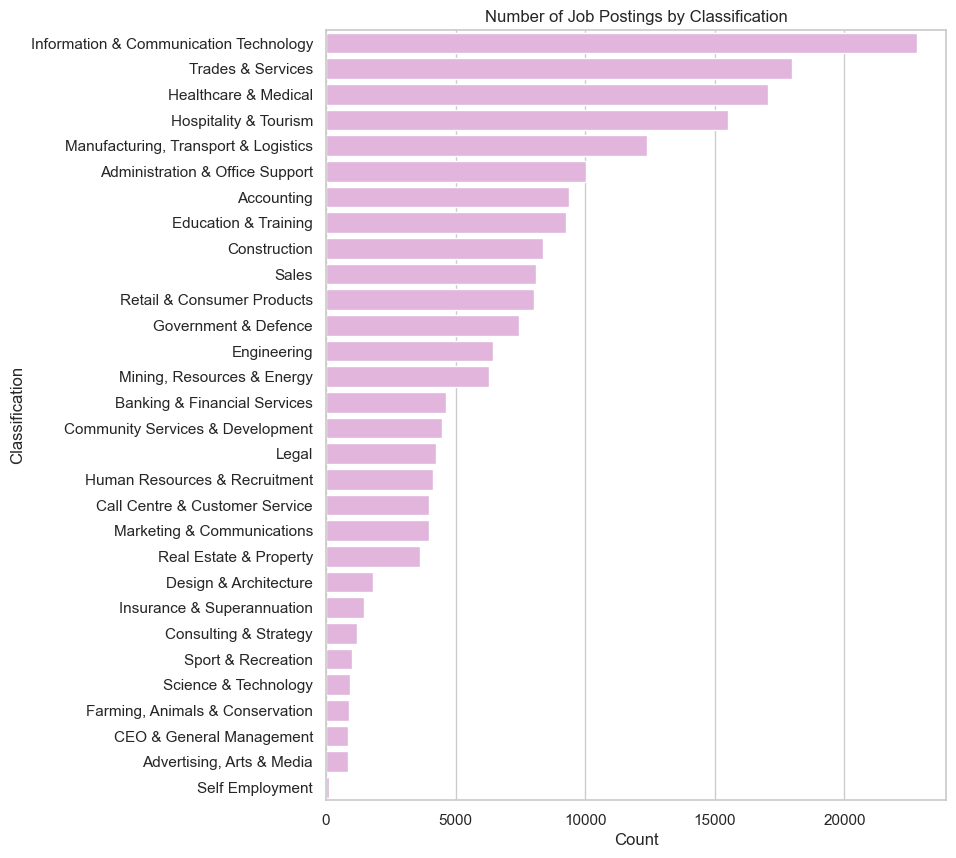

In [9]:
plt.figure(figsize=(8,10))
sns.barplot(data=classificationDf,
            y="Classification",
            x="Count",
            color="#E8AEE2")

plt.title("Number of Job Postings by Classification")
plt.show()

Choose your favorite location. Visualize the market share of that location in pie chart.

In [11]:
# Pie char for job market share of classifications
from matplotlib import cm

df_pie = df['Classification'].groupby(df['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']
df2

,Classification,Value
Classification,,
Information & Communication Technology,Information & Communication Technology,22787
Trades & Services,Trades & Services,17966
Healthcare & Medical,Healthcare & Medical,17068
Hospitality & Tourism,Hospitality & Tourism,15513
"Manufacturing, Transport & Logistics","Manufacturing, Transport & Logistics",12372
Administration & Office Support,Administration & Office Support,10017
Accounting,Accounting,9365
Education & Training,Education & Training,9272
Construction,Construction,8369


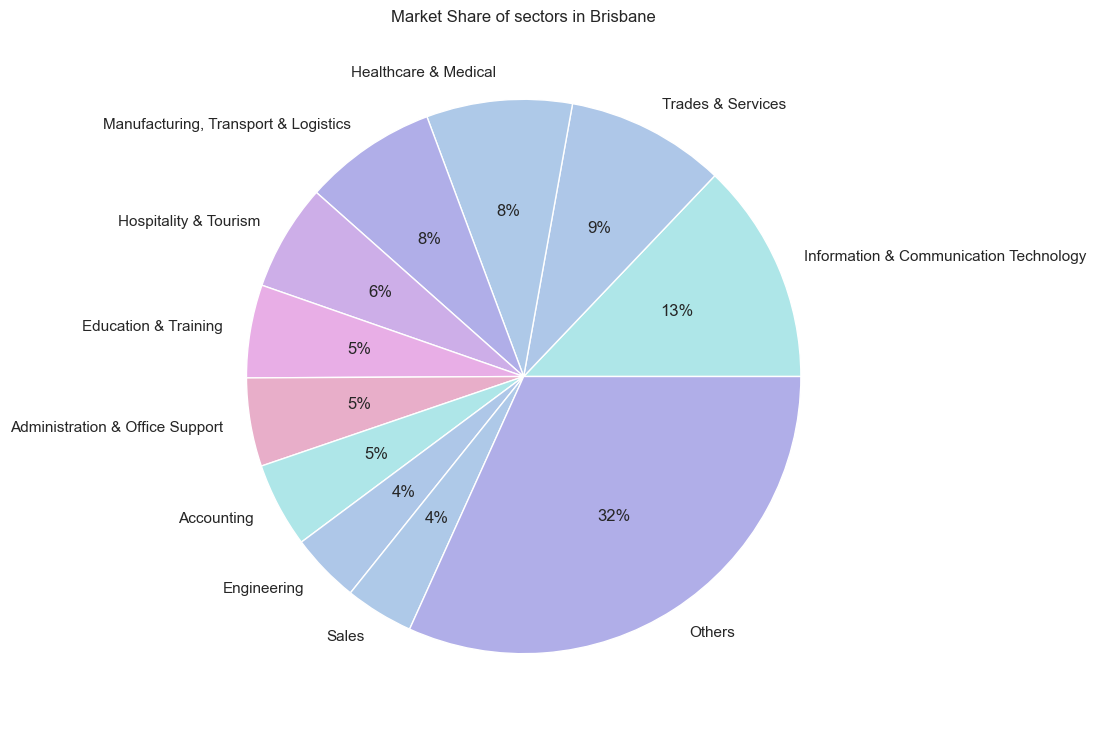

In [32]:
brisbane_df = df[df['Location'] == 'Brisbane']
df_pie = brisbane_df['Classification'].groupby(brisbane_df['Classification'])
df_pie = df_pie.count().sort_values(ascending=False).to_frame()

df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index

df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data={
    'Classification': ['Others'],
    'Value': [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']

plt.figure(figsize=(9, 9))
plt.title("Market Share of sectors in Brisbane")
plt.pie(df2["Value"], labels=df2["Classification"], autopct="%.0f%%", colors=colors)
plt.show()


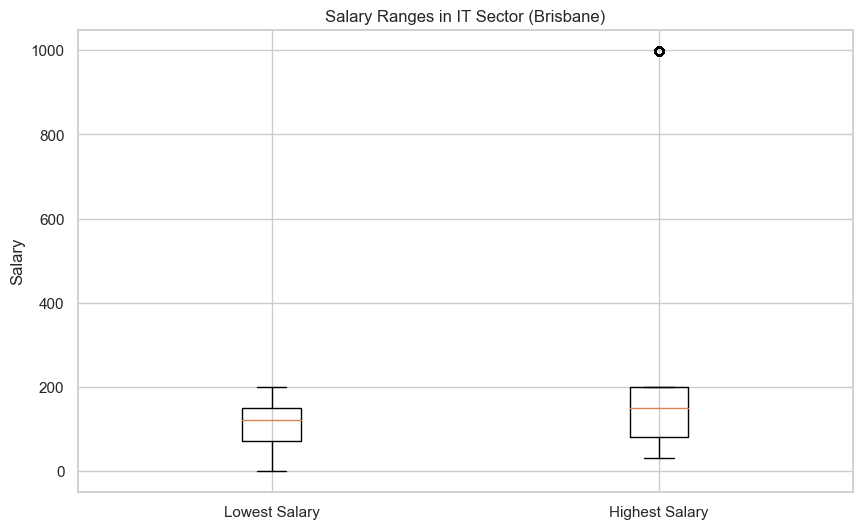

In [33]:
brisbane_it_df = df[(df['Location'] == 'Brisbane') & (df['Classification'] == 'Information & Communication Technology')]
salary_ranges = pd.concat([brisbane_it_df['LowestSalary'], brisbane_it_df['HighestSalary']], axis=1)

plt.figure(figsize=(10, 6))
plt.title("Salary Ranges in IT Sector (Brisbane)")
plt.boxplot(salary_ranges.values, labels=['Lowest Salary', 'Highest Salary'])
plt.ylabel("Salary")
plt.show()


In [34]:
brisbane_it_subsectors = df[(df['Location'] == 'Brisbane') & (df['Classification'] == 'Information & Communication Technology')]['SubClassification']
subsector_salary_ranges = []

for subsector in brisbane_it_subsectors.unique():
    subsector_data = df[(df['Location'] == 'Brisbane') & (df['Classification'] == 'Information & Communication Technology') & (df['SubClassification'] == subsector)]
    subsector_salary_ranges.append((subsector, subsector_data['LowestSalary'].min(), subsector_data['HighestSalary'].max()))

print("Salary ranges within the subsectors of the IT sector in Brisbane:")
for subsector, lowest_salary, highest_salary in subsector_salary_ranges:
    print(subsector)
    print("Lowest Salary:", lowest_salary)
    print("Highest Salary:", highest_salary)
    print()


Salary ranges within the subsectors of the IT sector in Brisbane:
Networks & Systems Administration
Lowest Salary: 0
Highest Salary: 999

Developers/Programmers
Lowest Salary: 0
Highest Salary: 999

Engineering - Network
Lowest Salary: 0
Highest Salary: 999

Consultants
Lowest Salary: 0
Highest Salary: 999

Help Desk & IT Support
Lowest Salary: 0
Highest Salary: 999

Engineering - Software
Lowest Salary: 0
Highest Salary: 999

Programme & Project Management
Lowest Salary: 0
Highest Salary: 999

Business/Systems Analysts
Lowest Salary: 0
Highest Salary: 999

Product Management & Development
Lowest Salary: 0
Highest Salary: 999

Architects
Lowest Salary: 0
Highest Salary: 999

Security
Lowest Salary: 0
Highest Salary: 999

Testing & Quality Assurance
Lowest Salary: 0
Highest Salary: 999

Telecommunications
Lowest Salary: 0
Highest Salary: 200

Sales - Pre & Post
Lowest Salary: 0
Highest Salary: 999

Other
Lowest Salary: 0
Highest Salary: 999

Web Development & Production
Lowest Salary: 0

Can you find the salary distribution for the top 30 cities for the number of job postings?
Visualize them in the boxplot chart.

In [15]:
city_counts = df['Location'].value_counts().nlargest(30)
top_cities = city_counts.index
df_top_cities = df[df['Location'].isin(top_cities)]


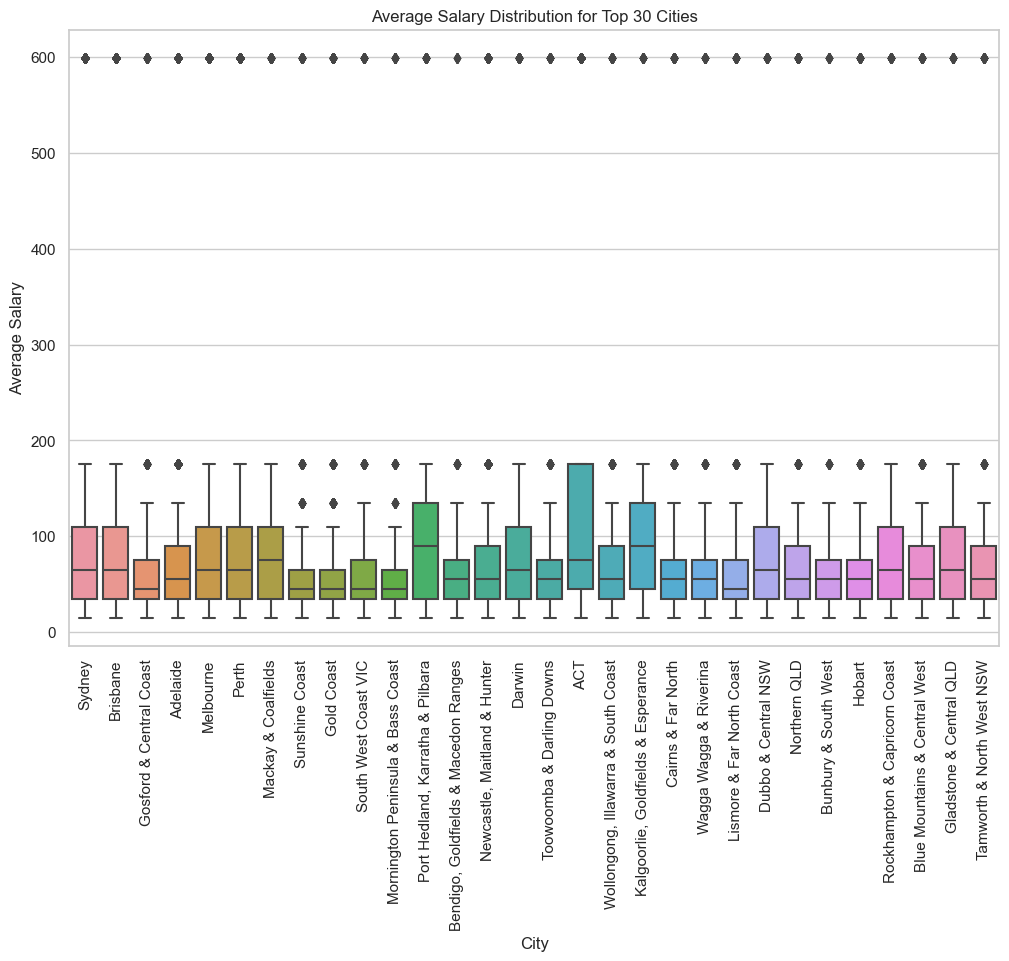

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='AverageSalary', data=df_top_cities)
plt.xticks(rotation=90)
plt.title('Average Salary Distribution for Top 30 Cities')
plt.xlabel('City')
plt.ylabel('Average Salary')
plt.show()

In [45]:
ictSubClassifications = df[df["Classification"] == 'Information & Communication Technology']
ictSubClassifications["SubClassification"].unique()


array(['Help Desk & IT Support', 'Sales - Pre & Post',
       'Networks & Systems Administration',
       'Programme & Project Management', 'Security', 'Consultants',
       'Architects', 'Other', 'Business/Systems Analysts',
       'Developers/Programmers', 'Web Development & Production',
       'Engineering - Software', 'Product Management & Development',
       'Engineering - Network', 'Team Leaders',
       'Testing & Quality Assurance', 'Management',
       'Database Development & Administration', 'Telecommunications',
       'Technical Writing', 'Engineering - Hardware',
       'Computer Operators'], dtype=object)

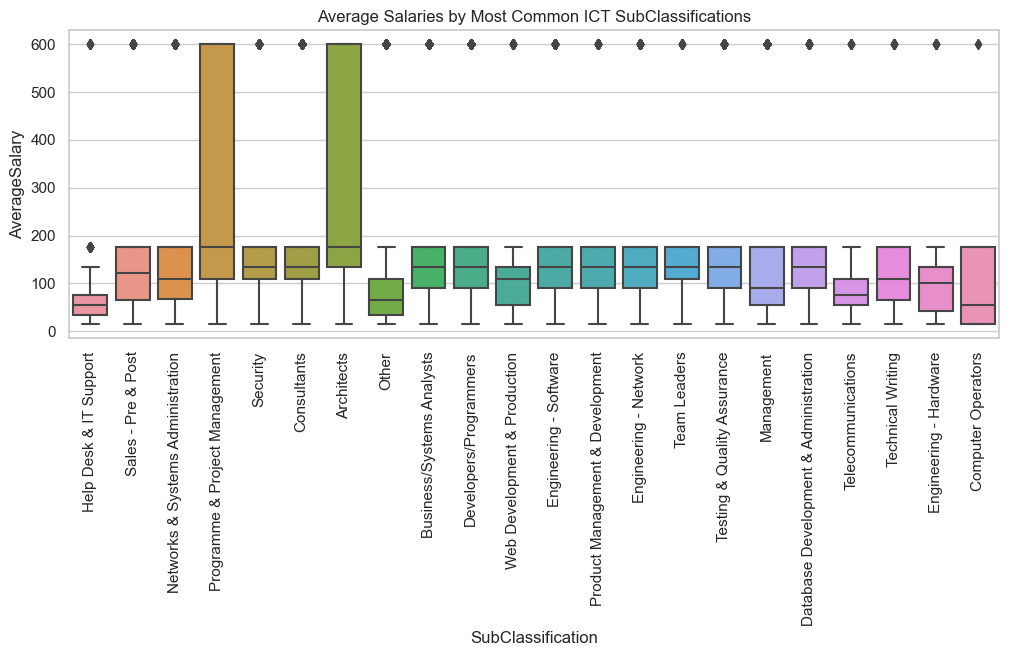

In [48]:
ictSubClassifications = df[df["Classification"] == 'Information & Communication Technology']

plt.figure(figsize=(12,4))
sns.boxplot(
    data=df,
    x="SubClassification",
    y="AverageSalary",
    order=ictSubClassifications["SubClassification"].unique()
)
plt.title("Average Salaries by Most Common ICT SubClassifications")
plt.xticks(rotation=90)
plt.show()

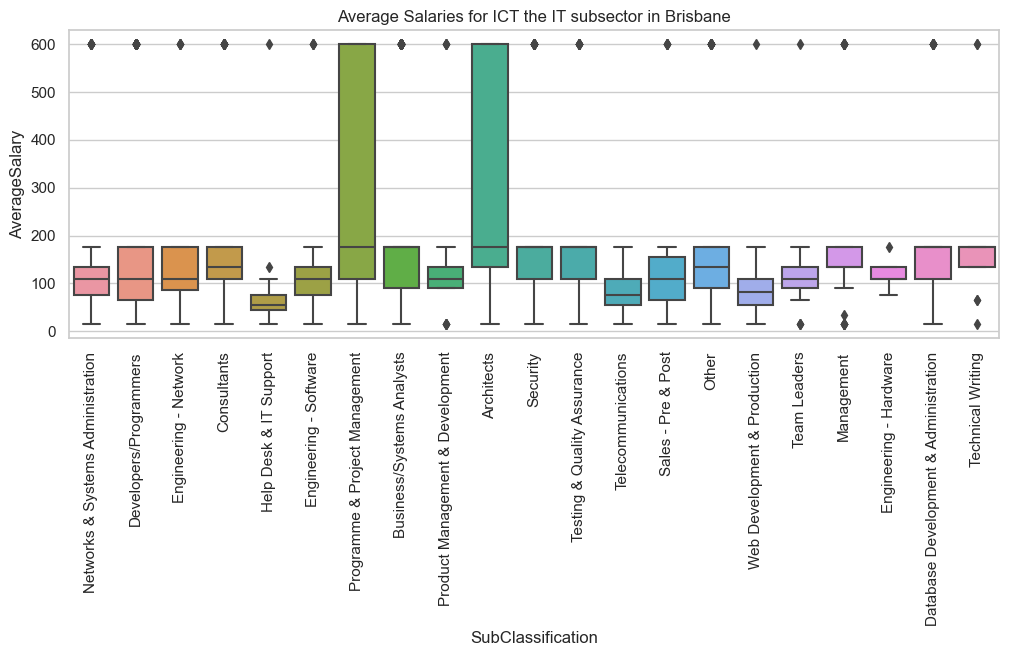

In [53]:
brisbane_ict_subclassifications = df[(df["Classification"] == 'Information & Communication Technology') & (df["Location"] == 'Brisbane')]

plt.figure(figsize=(12, 4))
sns.boxplot(
    data=brisbane_ict_subclassifications,
    x="SubClassification",
    y="AverageSalary",
    order=brisbane_ict_subclassifications["SubClassification"].unique()
)
plt.title("Average Salaries for ICT the IT subsector in Brisbane")
plt.xticks(rotation=90)
plt.show()


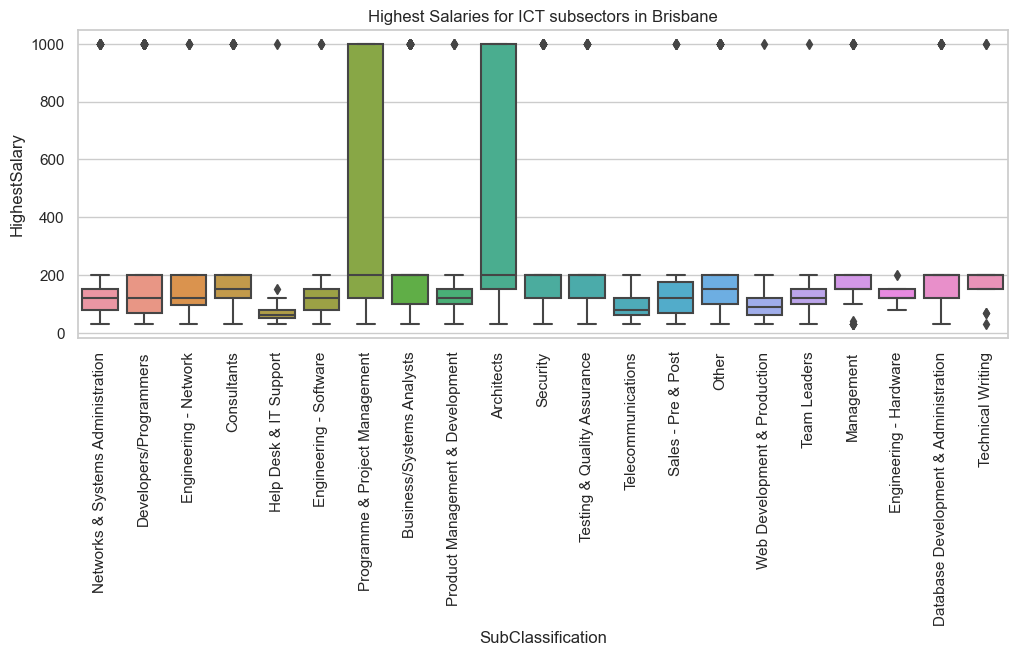

In [54]:
brisbane_ict_subclassifications = df[(df["Classification"] == 'Information & Communication Technology') & (df["Location"] == 'Brisbane')]

plt.figure(figsize=(12, 4))
sns.boxplot(
    data=brisbane_ict_subclassifications,
    x="SubClassification",
    y="HighestSalary",
    order=brisbane_ict_subclassifications["SubClassification"].unique()
)
plt.title("Highest Salaries for ICT subsectors in Brisbane")
plt.xticks(rotation=90)
plt.show()
